## Apply PCA and Clustering to Wholesale Customer Data

In this homework, we'll examine the [**_Wholesale Customers Dataset_**](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers), which we'll get from the UCI Machine Learning Datasets repository.  This dataset contains the purchase records from clients of a wholesale distributor.  It details the total annual purchases across categories seen in the data dictionary below:

**Category** | **Description** 
:-----:|:-----:
CHANNEL| 1= Hotel/Restaurant/Cafe, 2=Retailer (Nominal)
REGION| Geographic region of Portugal for each order (Nominal)
FRESH| Annual spending (m.u.) on fresh products (Continuous);
MILK| Annual spending (m.u.) on milk products (Continuous); 
GROCERY| Annual spending (m.u.)on grocery products (Continuous); 
FROZEN| Annual spending (m.u.)on frozen products (Continuous) 
DETERGENTS\_PAPER| Annual spending (m.u.) on detergents and paper products (Continuous) 
DELICATESSEN| Annual spending (m.u.)on and delicatessen products (Continuous); 

**_TASK:_** Read in `wholesale_customers_data.csv` from the `datasets` folder and store in a dataframe.  Store the `Channel` column in a separate variable, and then drop the `Channel` and `Region` columns from the dataframe. Scale the data and use PCA to engineer new features (Principal Components).  Print out the explained variance for each principal component. 

## K-Means, but Without All the Supervision
 

**_Challenge:_** Use K-Means clustering on the `wholesale_customers` dataset, and then again on a version of this dataset transformed by PCA.  

1. Read in the data from the `wholesale_customers_data.csv` file contained within the datasets folder.  

2. Store the `Channel` column in a separate variable, and then drop the `Region` and `Channel` columns from the dataframe.  `Channel` will act as our labels to tell us what class of customer each datapoint actually is, in case we want to check the accuracy of our clustering.  

3.  Scale the data, fit a k-means object to it, and then visualize the data and the clustering.  

4.  Use PCA to transform the data, and then use k-means clustering on it to see if our results are any better.  

**Challenge:_** Use the confusion matrix function to create a confusion matrix and see how accurate our clustering algorithms were.  Which did better--scaled data, or data transformed by PCA?



In [526]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import scipy

df = pd.read_csv('../Notebooks/Datasets/wholesale_customers_data.csv')

In [527]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Convert the Channel feature to binary using pandas get dummies.

In [528]:
X = df.iloc[:,2:] # Features
y = df.iloc[:,:-7] # Target variable
dummies = pd.get_dummies(df['Channel'], prefix='Channel')
df = pd.concat([df, dummies], axis=1)

df.drop(['Channel', 'Region'], axis=1, inplace=True)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2
0,12669,9656,7561,214,2674,1338,0,1
1,7057,9810,9568,1762,3293,1776,0,1
2,6353,8808,7684,2405,3516,7844,0,1
3,13265,1196,4221,6404,507,1788,1,0
4,22615,5410,7198,3915,1777,5185,0,1


### Descriptive statistics shows on average clients spend the most on fresh groceries and the least on delicassen.

In [581]:
df.describe()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,0.677273,0.322727
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.468052,0.468052
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.000000,0.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,0.000000,0.000000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,1.000000,0.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,1.000000,1.000000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,1.000000,1.000000


### Using StandardScaler to scale all features to give them equal importance.

In [582]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_s = standard_scaler.fit_transform(X)

# k-means algorithm where k = 2
km = KMeans(n_clusters=2)
km.fit(X_s)

y_pred = km.predict(X_s) + 1

compute_confusion_matrix_stats(confusion_matrix(y, y_pred))

Accuracy: 0.24545454545454545
Precision: 0.2613065326633166
Recall: 0.7323943661971831
F1_score: 0.3851851851851852


## Using attributes to identify the sum of squared distances of samples to the nearest cluster center

### Inertia

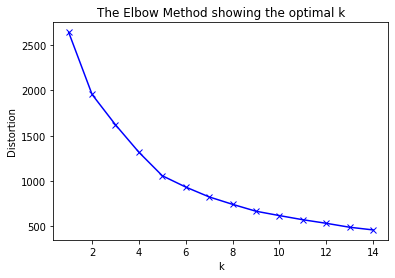

In [531]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X_s)
    sum_of_squared_distances.append(km.inertia_)
    

    # Plot the elbow
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Distortion

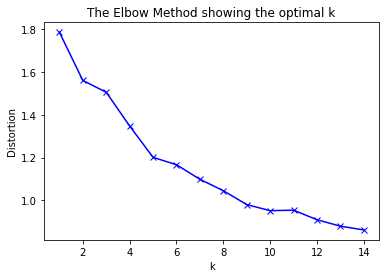

In [532]:
distortions = []
K = range(1, 15)
for k in K:
    # fit the k-means for a given k to the data (X)
    km = KMeans(n_clusters=k)
    km.fit(X_s)
    # distance.cdist finds the squared distances
    # axis=1 allows us to keep the min for each sample, not jsut the min across the entire dataset
    # find the closest distance for each sample to a center, and take the average
    distortions.append(sum(np.min(distance.cdist(X_s, km.cluster_centers_, 'euclidean'), axis=1)) / X_s.shape[0])

# Plot the elbow: bx- = use a solid (-) blue (b) line, 
# and mark the x-axis points with an x (x)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


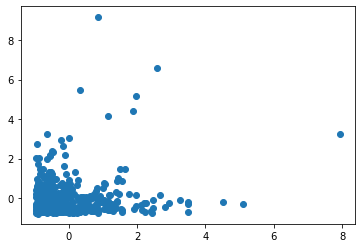

In [533]:
plt.scatter(X_s[:, 0], X_s[:, 1])

### Using PCA to transform the data (k=2)

In [576]:
# calculate the PCA
pca = PCA(n_components=2)

X_r = pca.fit_transform(X_s)



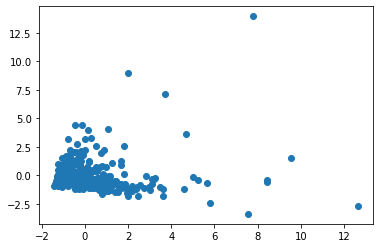

In [577]:
km = KMeans(n_clusters=k)
km.fit(X_r)
plt.scatter(X_r[:, 0], X_r[:, 1])

In [578]:
y_pred_class = km.predict(X_r) + 1

compute_confusion_matrix_stats(confusion_matrix(y, y_pred_class))

Accuracy: 0.6857142857142857
Precision: 0.5573770491803278
Recall: 0.85
F1_score: 0.6732673267326733


In [579]:
def compute_confusion_matrix_stats(confusion):
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]

    Accuracy = ((TP + TN) / float(TP + TN + FP + FN))
    print(f"Accuracy: {Accuracy}")
    
    Precision = TP / float(TP + FP)
    print(f"Precision: {Precision}")
    
    Recall = TP / float(FN + TP)
    print(f"Recall: {Recall}")
  
    F1_score = 2*Precision*Recall/float(Precision+Recall)
    print(f"F1_score: {F1_score}")
    

=> The K-Means clustering algorithm performes better overall with PCA.